Introduction
=============
This is a simple toy model intended for qualitative studies of virus spread. Similar results have been shared many time, but I wanted to describe the dynamics using my own terminology and using data that are available to the public. The model is intentionally somewhat explicit to make it more instructive.

After writing this piece I have found the [SIR and related models](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology), which in their essence do not seem very different from what I have developed below.


Background
=============

Fundamental model
----------
Assume that an individual can have one of four states namely healthy, infected, recovered or dead. Recovered individuals are healthy as such, but cannot be infected again. The number of individuals corresponding to the four states are $N_{\rm{h}}$, $N_{\rm{i}}$, $N_{\rm{r}}$, and $N_{\rm{d}}$. The total population count $N$ is given by $N_{\rm{h}} + N_{\rm{i}} + N_{\rm{r}} + N_{\rm{d}}$. The healthy population fraction $H$ is $N_{\rm{h}}/N$, the infected population fraction $I$ is $N_{\rm{i}}/N$, the recovered population fraction $R$ is $N_{\rm{r}}/N$ and the dead population fraction $D$ is $N_{\rm{d}}/N$.

The rate of change in the healthy population $\dot{H}$ can be written

$$\dot{H} = -\dot{I}_{+} = -2 E p_{\rm{t}} I H = -r_{\rm{I+}} I H, $$

where the dot symbolizes a time derivative. $\dot{I}_{+}$ is the contribution per unit time to the infected population $I$ from  healthy individuals becoming infected. The product $I H$ is related to the probability of an infected individual coming into contact with a healthy individual. $E$ is the number of contacts between any two people per unit time and $p_{\rm{t}}$ is the probability of the infection being transmitted if one of the two people is infected and the other is healthy. Thus, $Ep_{\rm{t}}$ is the expected value for the infectious contacts per unit time. The factor of 2 comes from the fact that the infection can be transmitted both when an infected individual meets a healthy individual and vice versa. Imagine a population with 50 % infected individuals ($I$) and 50 % healthy individuals ($H$). Then the total probability of an encounter between an infected individual and a healthy individual is $ I H +  H I = 2\cdot 0.25 = 0.5$.

If we assume that there is a characteristic $\tau$ time before an infected individual dies or recovers or equivalently that there is a fixed (positive) rate $r_{\rm{I-}}$ at which infected individuals recover or die. When further these events are uncorrelated the "decay" from the state of being infected is a Poisson process and the infection times will follow an exponential distribution (see e.g. [this description](https://www.phys.ufl.edu/courses/phy4803L/group_I/gamma_gamma/poisson.pdf)). Later we will look further into the influence of this fixed rate assumption. But for now, the rate at which the infected population diminishes may then be written

$$ \dot{I}_{-} = -r_{\rm{I-}} I .$$

The subscript on $I_{-}$ indicates that only contributions from processes reducing $I$ are included. We can define the characteristic infection time $\tau$ as the time where e.g. 80 % of the infected individuals have recovered or died. Then $r_{\rm{I-}} = -\log_e(1 - 0.8) / \tau $.  From $\dot{I}_{-}$ the recovery rate can be defined as


$$\dot{R} = -p_{\rm{r}} \dot{I}_{-}, $$


where $p_{\rm{r}}$ is the proportion of infected individuals that will recover. Similarly, the rate of change in the dead population can be written

$$ \dot{D} = -p_{\rm{d}} \dot{I}_{-} ,$$

where $p_{\rm{d}}$ is the proportion of infected individuals that will die. Since there are only two possible outcomes from an infection namely recovery or death we have $p_{\rm{r}} + p_{\rm{d}} = 1$. With these definitions, recovery and death happens at the same timescale. The total population count is preserved (including deads) and therefore the rate of change in the infected individuals can be written

$$ \dot{I} = \dot{I}_{+} + \dot{I}_{-} = -\dot{H} - \dot{R} - \dot{D} .$$

By solving these coupled ordinary differential equations the infection dynamics can be simulated. 

In addition to the states introduced above the infected individuals that require hospitalization $I_{\rm{h}} = p_{\rm{h}} I$ as well as infected individuals that require mechanical ventilation $I_{\rm{v}} = p_{\rm{v}} I_{\rm{h}}$ are calculated. 
$p_{\rm{h}}$ is the fraction of infected individuals that require hospitalization and $p_{\rm{v}}$ is the fraction of infected and hospitalized individuals that require mechanical ventilation. The proportion of infected individuals that will die if they require mechanical ventilation, but a ventilator is not available is $p_{\rm{d,nv}}$. If a ventilator is available this proportion is $p_{\rm{d}}$ as for the remaining infected population.

It is useful to investigate which parameter combination would result in a constant number of infections i.e. $\dot{I} = 0$. For this to be fulfilled the positive and negative contributions must balance which yields

$$-\dot{I}_{+} = \dot{I}_{-} \Leftrightarrow -r_{\rm{I+}} I H = -r_{\rm{I-}} I.$$

Rearranging a bit we find

$$ \frac{r_{\rm{I+}}}{r_{\rm{I-}}} =  \frac{1}{H}.$$

At early times when the infection is not very wide spread $H \approx 1$ and then condition becomes

$$ \frac{r_{\rm{I+}}}{r_{\rm{I-}}} = 1.$$

Thus, if $r_{\rm{I+}} / r_{\rm{I-}} < 1$ the number of infected individuals will decrease from day 0.

Heuristically, we will define the start of the outbreak as the time where the number of infected individual has reached 5 % of its maximum value. Similarly, the end of the outbreak is defined as the time where the number of infected individual has dropped to 5 % of its maximum value. The time between the start and end is the duration.

Multistage infections & delays
-------
The exponentially distributed infection time used above, rests on the assumption that the probability per unit time of exiting infection is constant.  Consequently, one can show that there is no memory in the system and therefore the rate of change in the infected population only depends on the current state and not the "age" of the infection. This is mathematically convenient, but may not represent reality. To relax this assumption let us assume that the infection can be divided into $k$ sequential stages and that the order from which an individual goes from being healthy to having recovered or died may be written

$$ H \rightarrow I_1 \rightarrow I_2 \rightarrow ... \rightarrow I_k \rightarrow D\:\rm{or}\:R.$$

$I_i (i \in 1...k)$ represents the $i$'*th* stage of the infection that may or may not represent a physiological state. An individual can only exit the infection from the $k$'*th* infection stage. Assuming an exponential waiting time distribution for the transition between all infection stages we may express the rate of change for the first infection stage as


$$ \dot{I}_{1} = r_{\rm{I+}} I H - r_1 I_1, $$

where $I = \sum_{i=1}^k I_i$. For the second infection stage we have

$$ \dot{I}_{2} = r_1 I_1 - r_2 I_2, $$

and similarly up until the $k$'*th* stage

$$ \dot{I}_{k} = r_{k-1} I_{k-1} - r_k I_k. $$

In all the rate equations $r_i > 0$. If $r_i = r$ the waiting times for exiting infection $I$ follow Erlang($t; r, k$) since Erlang($t; r, k$) is the waiting time for $k$ events in a Poisson process with rate $r$ (see e.g. [Wikipedia](https://en.wikipedia.org/wiki/Erlang_distribution)). Therefore, the exponential distribution is actually an Erlang distribution with $k$=1. The breakdown of the Erlang waiting time distribution into $k$ sequential exponential stages is commonly referred to as the "Linear Chain Trick" or "LCT". Explicitly accounting for the infectious stages has the advantage of preserving the equation system as a set of coupled ordinary differential equations (ODE) without any further analytical work. Alternatively, we would find ourselves in the realm of delay differential equations. Also, keeping the explicit coupled ODE form we are not constrained to using the same rate in all infection stages.

Still there are some properties of the Erlang distribution that are useful to recognize to better interpret the results from a simulation with a multistage infection. For a fixed rate both the mean and variance increase with increasing $k$. If, however, we fix the mean (infection time) to the value used in a single stage ($k$=1 i.e. exponential) model the rate parameter in the Erlang distribution $r_{Erl}$ should be $k$ times the exponential rate parameter $r_{Exp}$ i.e.

$$ r_{Erl} = kr_{Exp}$$

The variance is $k$ times smaller than the variance of the corresponding exponential i.e.

$$ \sigma^2_{Erl} = \frac{k}{r_{Erl}^2} = \frac{k}{(kr_{Exp})^2} = \frac{\sigma^2_{Exp}}{k}.$$


Further, the symmetry increases (decreasing skewness) with increasing k. All in all, with increasing $k$, the waiting time distribution gets "lighter tails" and there will be more probability mass above the mean. These features can be seen when the distributions are [plotted](https://en.wikipedia.org/wiki/Erlang_distribution).


Limitations
--------------------
Some of the limitations in the model are listed below:

* no collateral effects are accounted for i.e. general scarcity of ambulances, health personnel, masks, psychological effects of interventions etc.,
* recovered individuals cannot be infected again (immunity),
* some couplings are neglected e.g. all infected individuals encounter $E$ individuals even if infected or hospitalized, and
* the parameters are not very accurate.

None of these simplifications will limit the learnings from this exercise. The parameter uncertainty is important if the simulations were to be used for real decision making (which they should not be!). Therefore, methods for handling such uncertainty will also be presented.


Results & discussion
==============
In the first five sub-sections we assume $k$=1 i.e. a single stage infection with exponentially distributed waiting times. In the final sub-section we address the effect of delays.

Flu simulation
-------------------
The flu parameters can be estimated from [CDC](https://www.cdc.gov/flu/about/burden/preliminary-in-season-estimates.htm). The factorization of $r_{\rm{I+}}$ is not important for the solution, but let us attempt to factorize it to get a better feel for the orders of magnitude involved. 

* Based on personal experience, I fix $E$ to 50. 
* Similarly, I set the infection time for a flu to seven days. 
* By hand, I adjust the transmission probability $p_{\rm{t}}$, which is more difficult to assert, to fit the actual number of fatalities due to flu in the U.S.. The value is 0.2513 %.

Then I run a flu simulation for Denmark assuming that the parameters obtained for the U.S. apply to Denmark. The results are shown below in the figure below where the arrows in the legend indicates which axis the data belongs to.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0         5 
Infctn time (τ)           7 day
Infctns at τ           20.0 %
Infctn stages (k)         1 
Mean infctn time      4.349 day
r_I+                  0.251 /day
r_I-                  0.230 /day
k*r_I+ / r_I-         1.093 
p_t                    0.25 %
p_h                    1.44 %
p_d                    0.10 %
p_v                    0.00 %
p_d,nv                 0.00 %
--------------------------------


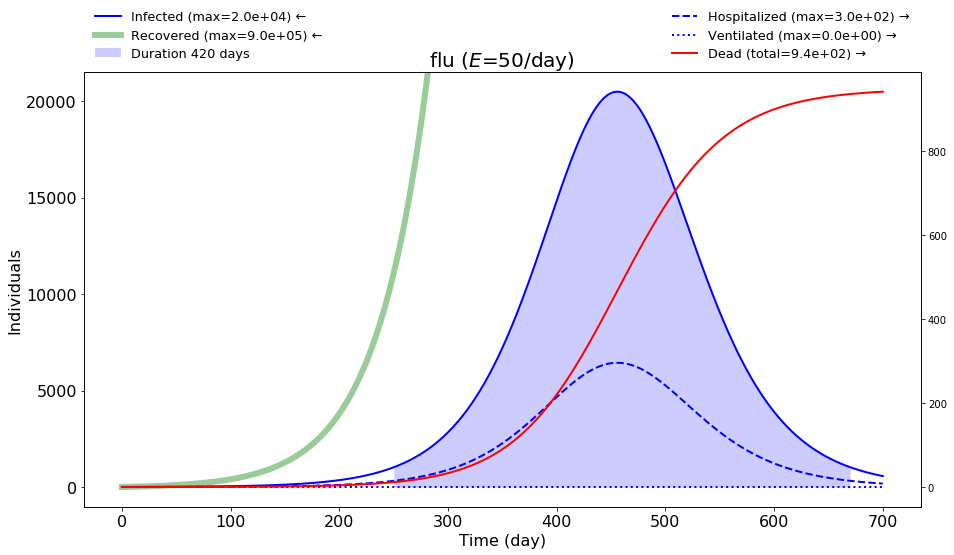

In [1]:
from src import run
encounters_per_day = 50
run.virus('flu', 'denmark', encounters_per_day)

We see that the flu season results in 10$^3$ deaths and lasts for about 420 days. At its maximum $20 \cdot 10^3$ people will be infected and $0.3 \cdot 10^3$ will be hospitalized. About 20 % of the population will be infected during the epidemic. The death count is quite close to the actual number of [fatalities due to flu in Denmark](https://www.ssi.dk/sygdomme-beredskab-og-forskning/sygdomsovervaagning/i/influenzasaesonen---opgoerelse-over-sygdomsforekomst-2018-19). In general parameters cannot be expected to be universal due to differences in e.g. population density which would most likely affect $E$ and due to cultural differences in e.g. how people greet (hand shake, bow, nod, hug, kiss) which would affect $p_{\rm{t}}$. The predicted duration of 420 days seems very high and we cannot validate the maximum infection count of $20 \cdot 10^3$. We will take a closer look at these two numbers in the section [Multistage infections](#Multistage_infections).

As expected, the simulated death rate is consistent with $p_{\rm{d}}$. The initial number of infected individuals, here set to five, only affects the onset time and not the total number of deads. In the example above about 1 ‰ of the population is infected after ~230 days. Starting with e.g. 500 infected individuals we find that 1 ‰ of the population is infected after 80. days, but all other results are unchanged (data not shown). Such a shift in the onset is not important here.

COVID-19 simulation (no intervention scenario)
-------------
For the COVID-19 simulation with no intervention I use the same parameters as in the flu simulation except the infection time has been increased from seven days to 14 days, which is a frequently mentioned number for quarantine period. Further, $p_{\rm{d}}$ is estimated to lie in the range 0.5 to 1 % (see e.g. [here](https://www.bbc.com/news/health-51674743) or [here](https://edition.cnn.com/2020/03/30/health/coronavirus-lower-death-rate/index.html) ). Here we will use 0.5 % which gives a lower bound for the number of fatalities. Note that I have not increased the transmission probability only the infection time, which will, in turn, increase the number of healthy individuals one infected individual will encounter. In the previous section  we successfully used $p_{\rm{t}}$ based on flu data from the U.S. to simulate flu in Denmark. Whether $p_{\rm{t}}$ can also be considered virus independent, as we have assumed here, is up to experts to verify. In any case, with our assumptions, the simulation results are shown below.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0         5 
Infctn time (τ)          14 day
Infctns at τ           20.0 %
Infctn stages (k)         1 
Mean infctn time      8.699 day
r_I+                  0.251 /day
r_I-                  0.115 /day
k*r_I+ / r_I-         2.186 
p_t                    0.25 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


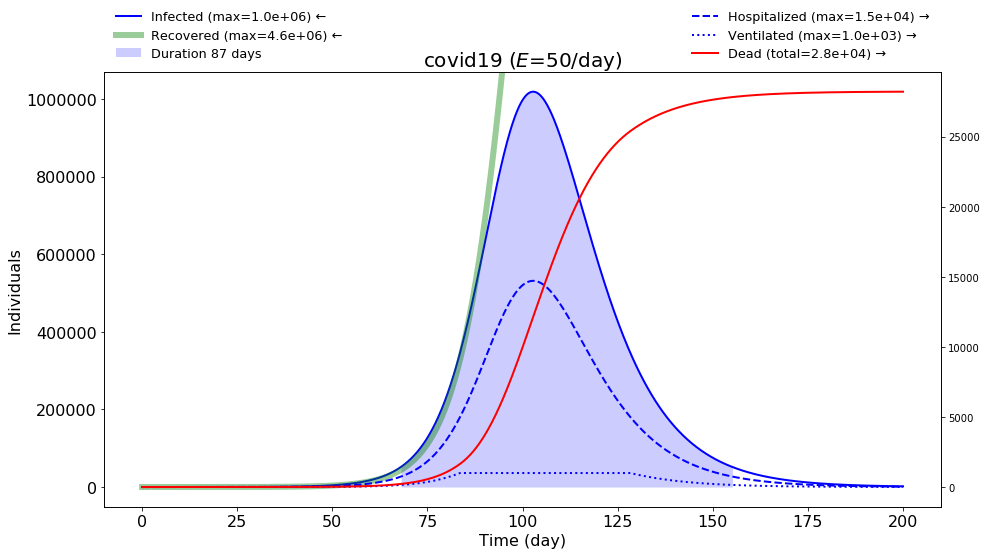

In [2]:
run.virus('covid19', 'denmark', encounters_per_day)

With no intervention the COVID-19 epidemic is, in this scenario, predicted to last about 87 days and results in $28\cdot10^3$ deaths. We have used $p_{\rm{v}}$ = 20 % and $p_{\rm{d,nv}}$ = 90 %. In other words [20 % of the hospitalized individuals require mechanical ventilation](https://jv.dk/artikel/fakta-sådan-udvikler-corona-indlæggelser-sig-2020-3-29) and 90 % of infected individual that require a mechanical ventilation will die if no ventilator is available. The value of $p_{\rm{d,nv}}$ is a number that I made up without any credible references. About 80 % of the population will be infected during the epidemic.
With no limit on the number of ventilators the death count would  $23\cdot 10^3$ (data not shown), which corresponds to 0.5 % of $R$ + $D$ and is therefore consistent with $p_{\rm{d}}$. The excess death count due to lack of ventilators ($5\cdot 10^3$) is of course strongly dependent on $p_{\rm{d,nv}}$, which is quite uncertain given that it is simply set to 90 % without any references or medical insight. Further, the maximum infection count in the flu simulation was not validated against data and consequently maximum infection count in the COVID-19 case may not represent the truth. Since the maximum infection count  essentially governs the excess death count due to lack of ventilators it is important to keep this uncertainty in mind. We will take a closer look at maximum infection count in the section [Multistage infections](#Multistage_infections).

COVID-19 simulation (flattened scenario)
-------------------
In this section, the encounters per day is reduced from 50 to 30 to simulated some degree of social distancing. This makes the ratio $r_{\rm{I+}} / r_{\rm{I-}}$ drop from 2.19 (no intervention) to 1.31. The results are shown below.

--------------------------------
Parameters
--------------------------------
Encounters               30 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0         5 
Infctn time (τ)          14 day
Infctns at τ           20.0 %
Infctn stages (k)         1 
Mean infctn time      8.699 day
r_I+                  0.151 /day
r_I-                  0.115 /day
k*r_I+ / r_I-         1.312 
p_t                    0.25 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


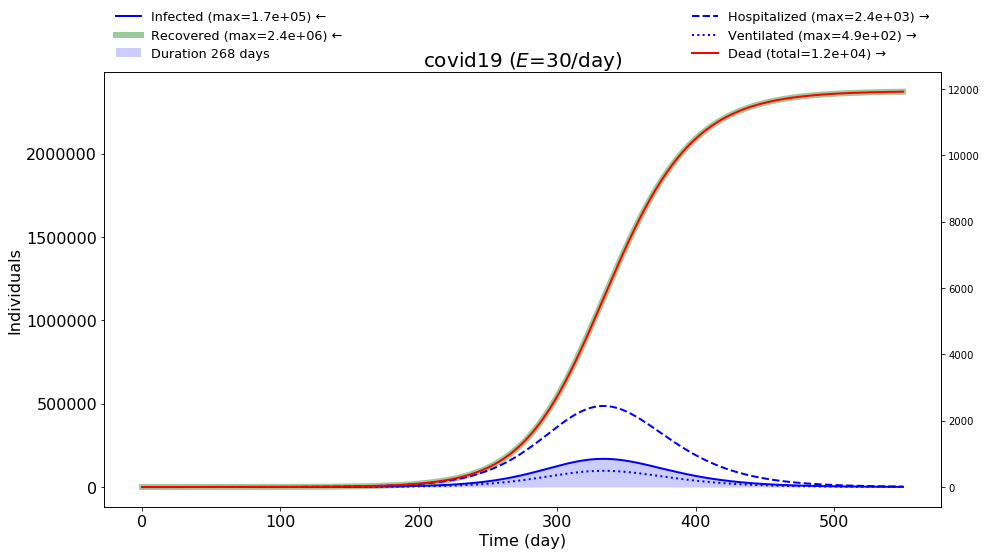

In [3]:
encounters_per_day = 30
run.virus('covid19', 'denmark', encounters_per_day, show_recovered=True, tspan=[0, 550])

We see that mild social distancing reduces the peak and total number of infected individuals and the infection peak arrives later than in the no intervention scenario. Further, the number of deads is also significantly reduced although the number is still quite high. This is the so-called flattened curve. Note that the upper limits of both the x-axis and the y-axis are different compared to the previous figure.

COVID-19 simulation (damped scenario)
-----------------------
If we increase the social distancing even further and reduce the encounters per day to 15 $r_{\rm{I+}} / r_{\rm{I-}}$ drops from 2.19 (no intervention) to 0.66.   

--------------------------------
Parameters
--------------------------------
Encounters               15 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0         5 
Infctn time (τ)          14 day
Infctns at τ           20.0 %
Infctn stages (k)         1 
Mean infctn time      8.699 day
r_I+                  0.075 /day
r_I-                  0.115 /day
k*r_I+ / r_I-         0.656 
p_t                    0.25 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


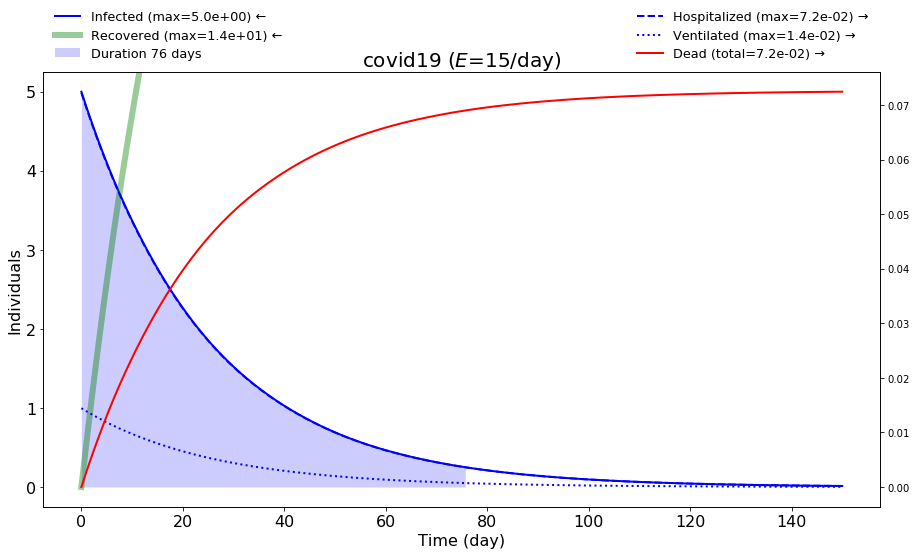

In [4]:
encounters_per_day = 15
run.virus('covid19', 'denmark', encounters_per_day, tspan=[0, 150])

Since $r_{\rm{I+}} / r_{\rm{I-}}$ is less than unity the infection count steadily drops toward zero. Note that the number of hospitalized and dead individuals is a less than one but non-zero. This is simply an artifact of the model which is continuous.

Parameter uncertainty
-----------------------------
Since many of the model parameters are quite uncertain it is instructive to look variations in the solution with respect to some of these parameters. First I will illustrate a parameter gridding method, which is nice for getting a qualitative overview and then I will show a more quantitative approach.

### Parameter grid
Here I  simply vary two parameters namely $p_{\rm{d}}$ and $\tau$ on a regular grid and calculate the number of deads in each grid point. All other parameters are the same as in the no intervention scenario. The result is shown below.

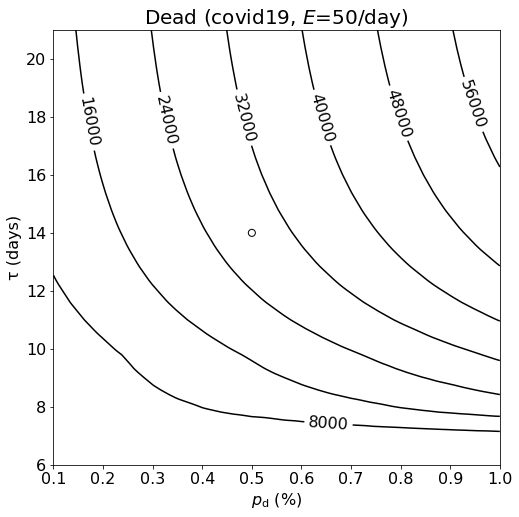

In [5]:
par1 = dict(axlabel=r'$p_{\rm{d}}$ (%)',
            name='p_d',
            min=0.001,
            max=0.01,
            transform=run.frc_to_pct
            )

par2 = dict(axlabel='τ (days)',
            name='tau',
            min=6,
            max=21,
            )

response = dict(name='dead',
                transform=run.get_last,
                title="Dead",
               )

encounters_per_day = 50
run.contour('covid19', 'denmark', par1, par2, response, encounters_per_day, tspan=[0, 400])

The black open circle marks the parameters used in the no intervention scenario (nominal parameters). In the vicinity of the nominal parameters a four day increase in $\tau$ would result in an additional $4\cdot 10^3$ deads while a four day deacrease would result in a $9 \cdot 10^3$ reduction in the number of deads. In contrast, the number of deads varies quite linearly with $p_{\rm{d}}$ for $\tau$ > 10 days. For $\tau$ < 10 days and $p_{\rm{d}}$ > 0.5 % the number of deads does not vary strongly with $p_{\rm{d}}$.

### Uncertainty propagation
To support decision making we should be able to account for uncertainties more quantitatively than in the gridding approach. An interesting question that I will use to illustrate uncertainty propagation is "*to what extent social distancing should be enforced in order for the ventilator capacity not to be exceeded*". 

At the time of writing little COVID-19 is not very well-known and the same goes for the model parameters and their uncertainties. Usually parameters are found as the maximum likelihood estimate (MLE) from some test data and the "best fit" values are reported along with the the standard error of these values (SEM). The SEM expresses the uncertainty of the MLE estimate given the data at hand. If a parameter estimate comes from Bayesian inference all relevant information is contained in the so-called posterior parameter distribution. In either case parameter distributions can be sampled and the resulting parameter sets can be propagated through the model to calculate the distributions of the model responses.

For the present work I have no such rigorous information on the parameter uncertainties, but to illustrate the approach let us study the effect of reducing the encounters per day $E$ to 30/day. People are different so let us assume that $E$ is well-described by a normal distribution and assign a standard deviation to $E$ of four days. Thus, about 68 % of the population will encounter between 26 and 34 people per day. In the examples presented in the previous sections the hospitalization fraction $p_{\rm{h}}$ was set to the value obtained from flu data so it is fair to assume that it is subject to some uncertainty. For simplicity, I will model this using a normal distribution with mean 1.3 % and standard deviation 0.3 % which, for all practical purposes, assures that $p_{\rm{h}}$ > 0 %. Also, let us include some variability in the infection time assuming a normal distribution with a mean of 14 days and a standard deviation of 2 days. All other parameters are fixed and the three parameters mentioned above are assumed to have no covariance. To summarize we have

* $E \sim \mathcal{N}(\mu=30/day, \sigma=4/day)$
* $p_{\rm{h}} \sim \mathcal{N}(\mu$=1.3 %, $\sigma$=0.3 %)
* $\tau \sim \mathcal{N}(\mu$=14 days, $\sigma=2~\rm{days})$
* $p_{\rm{d}}$ = 0.5 %
* $p_{\rm{t}}$ = 0.3 %
* $p_{\rm{v}}$ = 20 %

Now we draw one sample of the parameters ($p_{\rm{h}}$, $\tau$, $E$) and augment these with the fixed parameters. From this parameter set we run the virus simulation and save the result. This process is repeated until sampling is sufficient. In the figure below the left panels show the sampled parameter distributions while the right panel shows the resulting distribution for the required number of ventilators. 


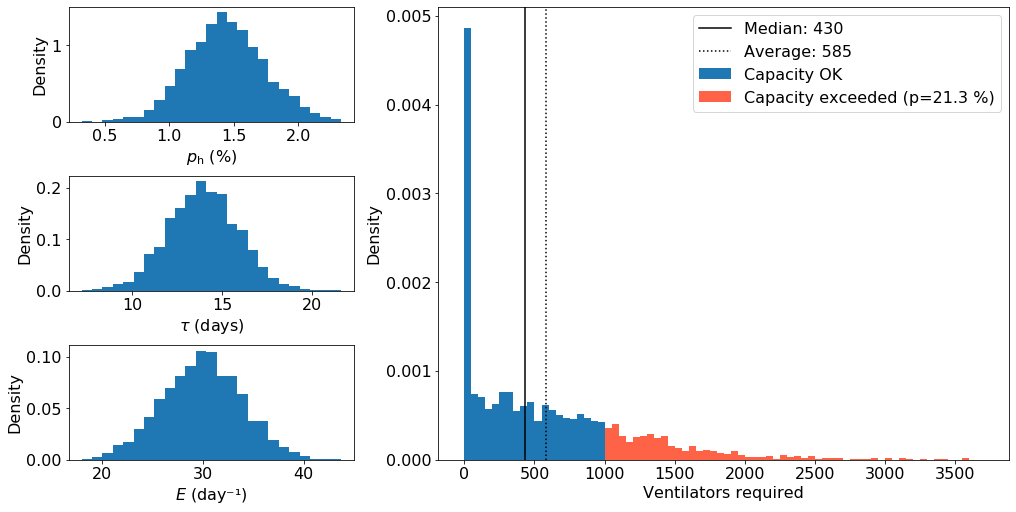

In [6]:
import numpy as np
from src import render

# Seed to get the same results with limited sampling
np.random.seed(0)

# Leave out mean value "mean" to use nominal as mean
par1 = dict(axlabel=r'$p_{\rm{h}}$ (%)',
            name='p_h',
            std=0.003,
            transform=run.frc_to_pct
            )

par2 = dict(axlabel=r'$\tau$ (days)',
            name='tau',
            std=2.,
            )

par3 = dict(axlabel='$E$ (day\u207B\u00B9)',
            name='E',
            std=4.,
            )

pars = par1, par2, par3


response = dict(name='ventilators_required',
                transform=run.get_max,
                title="Ventilators required",
               )

encounters_per_day = 30
times, values = run.ua('covid19', 'denmark',
                       encounters_per_day, pars, response,
                       nsamples=2500, tspan=[0, 300])

As we saw in a previous section (flattened scenario), ~490 ventilators are required when simulating using the nominal parameters ($p_{\rm{h}}$, $\tau$, $E$) = (1.3 %, 14 days, 30/day). However, as expected, many scenarios result in a higher number of required ventilators. The red area illustrates the region where the ventilator capacity is exceeded. This occurs in 21 % of the sampled scenarios. Whether 21 % is a "high", "low" number is a political question, but if it is considered is too high the average $E$ must be reduced below 30/day. The spike at zero ventilators required comes from parameter combination where $r_{\rm{I+}} / r_{\rm{I-}}$ drops below unity and therefore these scenarios are damped with no epidemic. Note that the assumption $p_{\rm{h}} \sim \mathcal{N}(\mu$=1.3 %, $\sigma$=0.3 %) results in ~50 % of the samples having $p_{\rm{h}}$ < 1.3 %. If experts advice that this is not realistic another distribution should be used.

The full time series corresponding to the sampling are shown below along with the median time series and selected percentile intervals for the time series. Note that the maximum of the average curve shown below (~360) is not the same as the average of the maxima for the individual curves shown above (585).

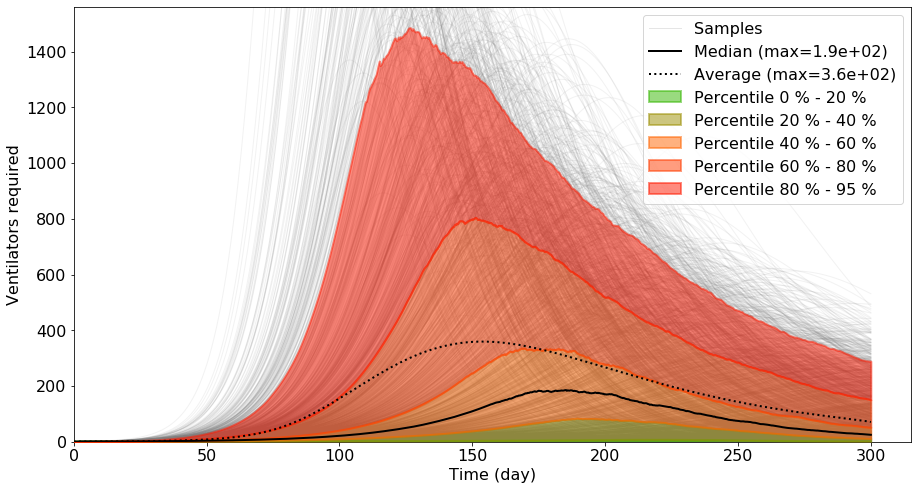

In [7]:
render.ua_timeseries(times, values.T)

Multistage infections
------

<a id='Multistage_infections'></a>

Before we show results for virus simulations that incorporate multiple infection stages let us look more closely at the exponential and Erlang distributions. As an example let us  compare Exp($r$=0.133) with Erlang($r$=0.667, $k$=5). Both distributions have the same mean value (7.5), but the top panel in the figure below shows that the two probability distribution functions look quite different. The exponential has the highest density at $x$=0 while the density of the Erlang distribution is essentially zero here. The solid and dashed black lines in the bottom panel shows the corresponding survival functions (1 - cumulative distribution function). Qualitatively, there is a delay in the Erlang survival function followed by a decay, which is steeper than that for the exponential. Both the two PDFs and the two CDFs are calculated from analytical expressions. 

mean erlang:  7.5


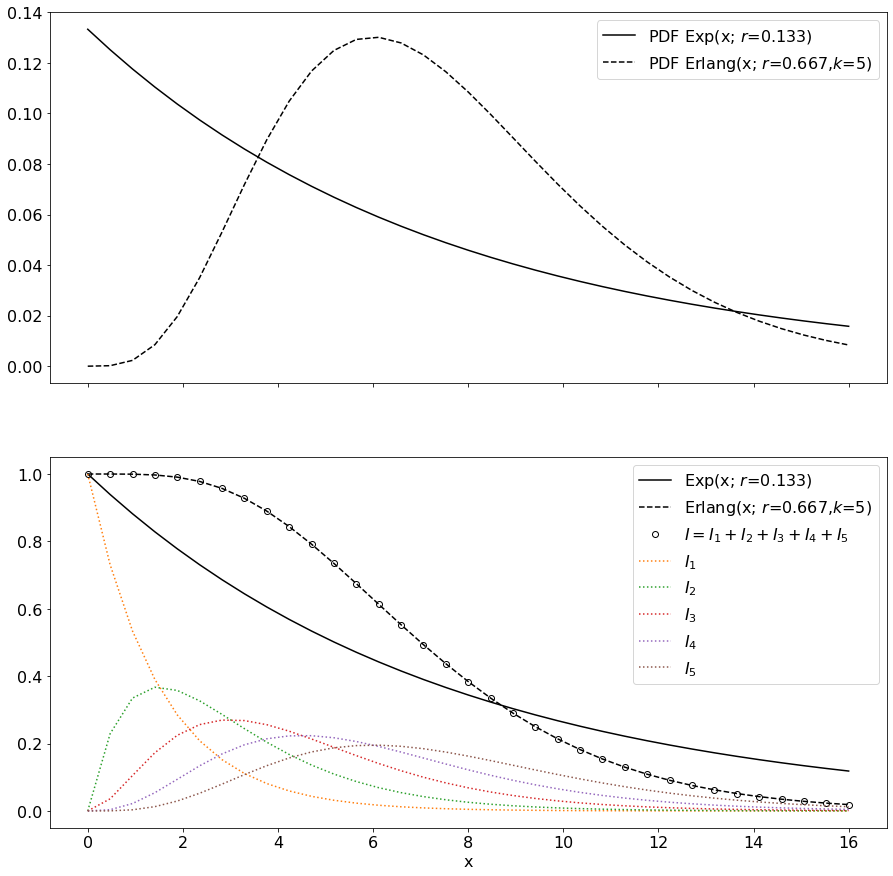

In [8]:
import src.multistage as multistage

k = 5
scale = 1.5
rate = 1./scale
# Adjust exp rate to same mean as Erlang
rate_exp = rate/k 

multistage.example(rate, rate_exp, k)

The bottom panel in the figure above also shows the survival function $I$ of Erlang($r$=0.667, $k$=5) in open circles  calculated by solving the five coupled ODEs for the five sequential exponential stages. The five contributions to the survival function $I$ coming from the five stages are shown in dotted colored lines. 

[DRAFT]
-----
Before simulating COVID-19 we need to refit $p_{\rm{t}}$ using $k$=5. Below we can see that $p_{\rm{t}}$ = 0.2097 % gives a total of $9.4 \cdot 10^2$ deads in a flu outbreak. Previously we saw that using $k$=1 and $p_{\rm{t}}$ = 0.2513 % gave the same number of deads. THE DIFFERENCE IS THE DURATION OF THE OUTBREAK!!!!.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0         5 
Infctn time (τ)           7 day
Infctns at τ           20.0 %
Infctn stages (k)         5 
Mean infctn time      5.208 day
r_I+                  0.210 /day
r_I-                  0.960 /day
k*r_I+ / r_I-         1.092 
p_t                    0.21 %
p_h                    1.44 %
p_d                    0.10 %
p_v                    0.00 %
p_d,nv                 0.00 %
--------------------------------


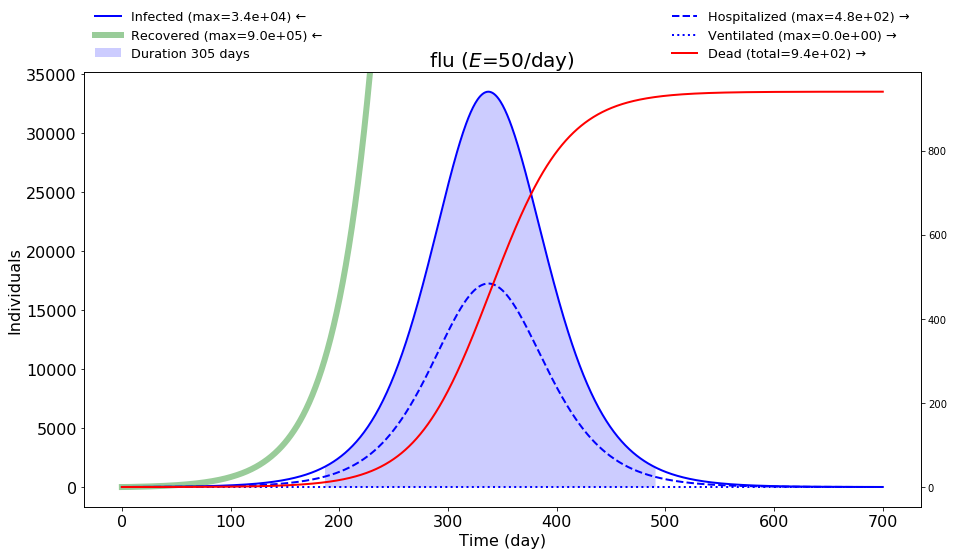

In [9]:
encounters_per_day = 50
run.virus('flu', 'denmark', encounters_per_day, k=5, p_t=0.002097)

With the same assumptions as before regarding the equivalence between the flu and COVID-19 we can now run a COVID-19 simulation with $k$=5. 

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0         5 
Infctn time (τ)          14 day
Infctns at τ           20.0 %
Infctn stages (k)         5 
Mean infctn time     10.415 day
r_I+                  0.210 /day
r_I-                  0.480 /day
k*r_I+ / r_I-         2.184 
p_t                    0.21 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


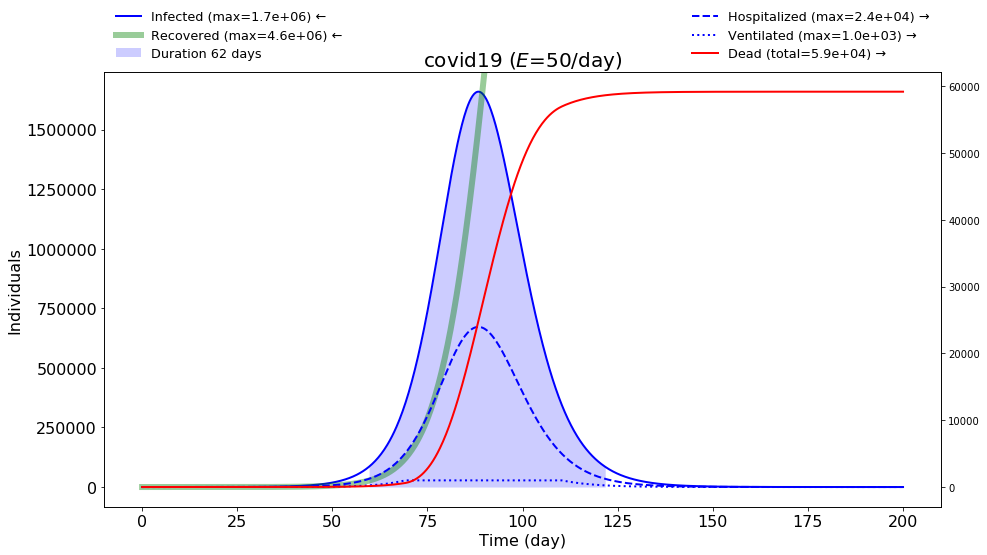

In [10]:
run.virus('covid19', 'denmark', encounters_per_day, k=5, p_t=0.002097)

With no intervention the COVID-19 epidemic is, with $k$=5, predicted to last about 70 days and results in $54\cdot10^3$ deaths. With no limit on the number of ventilators the death count would  $23\cdot 10^3$ (data not shown) as was the case with $k$=1. The excess death count due to lack of ventilators increases from $5\cdot 10^3$ using $k$=1 to $31\cdot 10^3$ using $k$=5.

THE DIFFERENCE IS THE DURATION OF THE OUTBREAK!!!!. Intensity

Outlook
=======
For me this has been an instructive modeling exercise and I hope you have enjoyed it. As time goes by we will learn more about COVID-19 and the model parameters. By then I might have time to update this notebook, but in case I don't I find it quite illustrative as is. 

With more time and better parameters it would relatively straight forward to introduce sub-populations such as vulnerable, kids and average adults. These sub-populations could be assigned different behavioral patterns ($E$, $p_{\rm{t}}$) and different health parameters ($p_{\rm{d}}$, $p_{\rm{i}}$, $p_{\rm{v}}$) to each such population. Such a model could simulate more advanced scenarios where different parts of the population were subject to different mitigation strategies.